<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


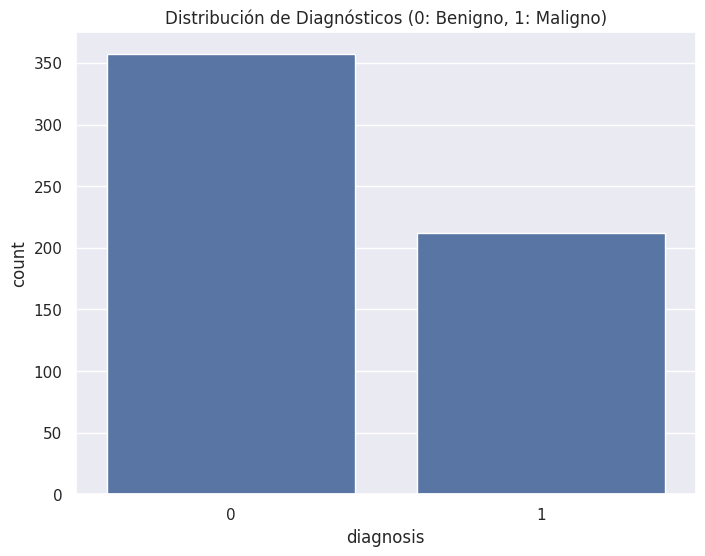

Proporción de casos benignos: 62.74%
Proporción de casos malignos: 37.26%

Forma del dataset: (569, 31)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64

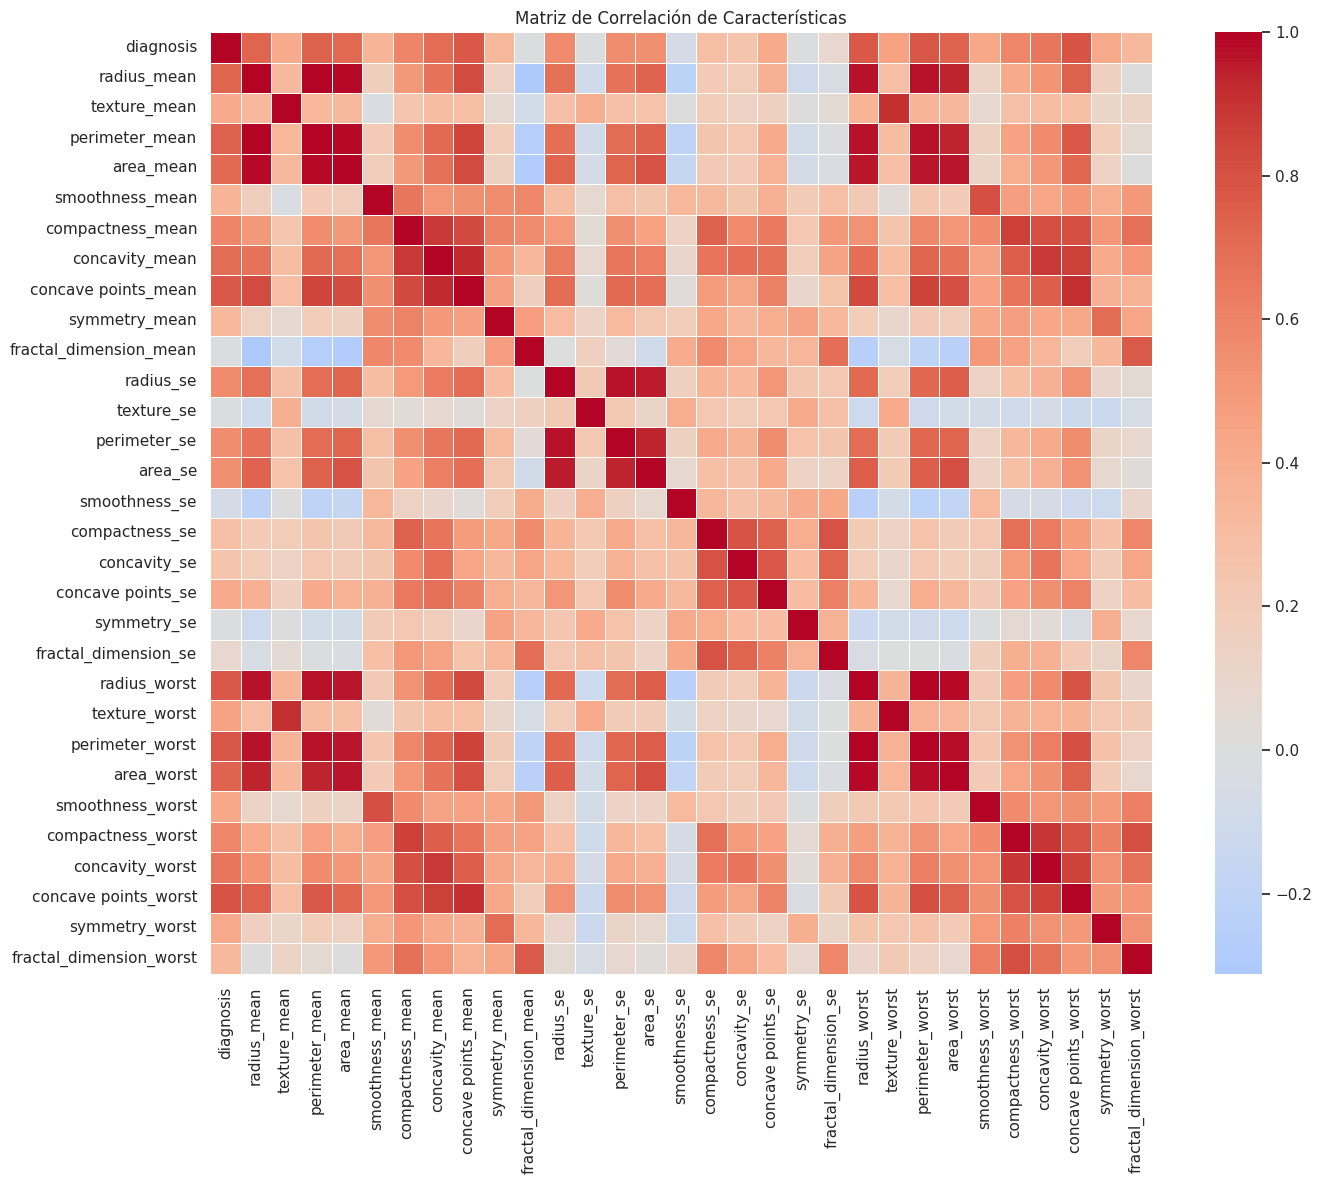

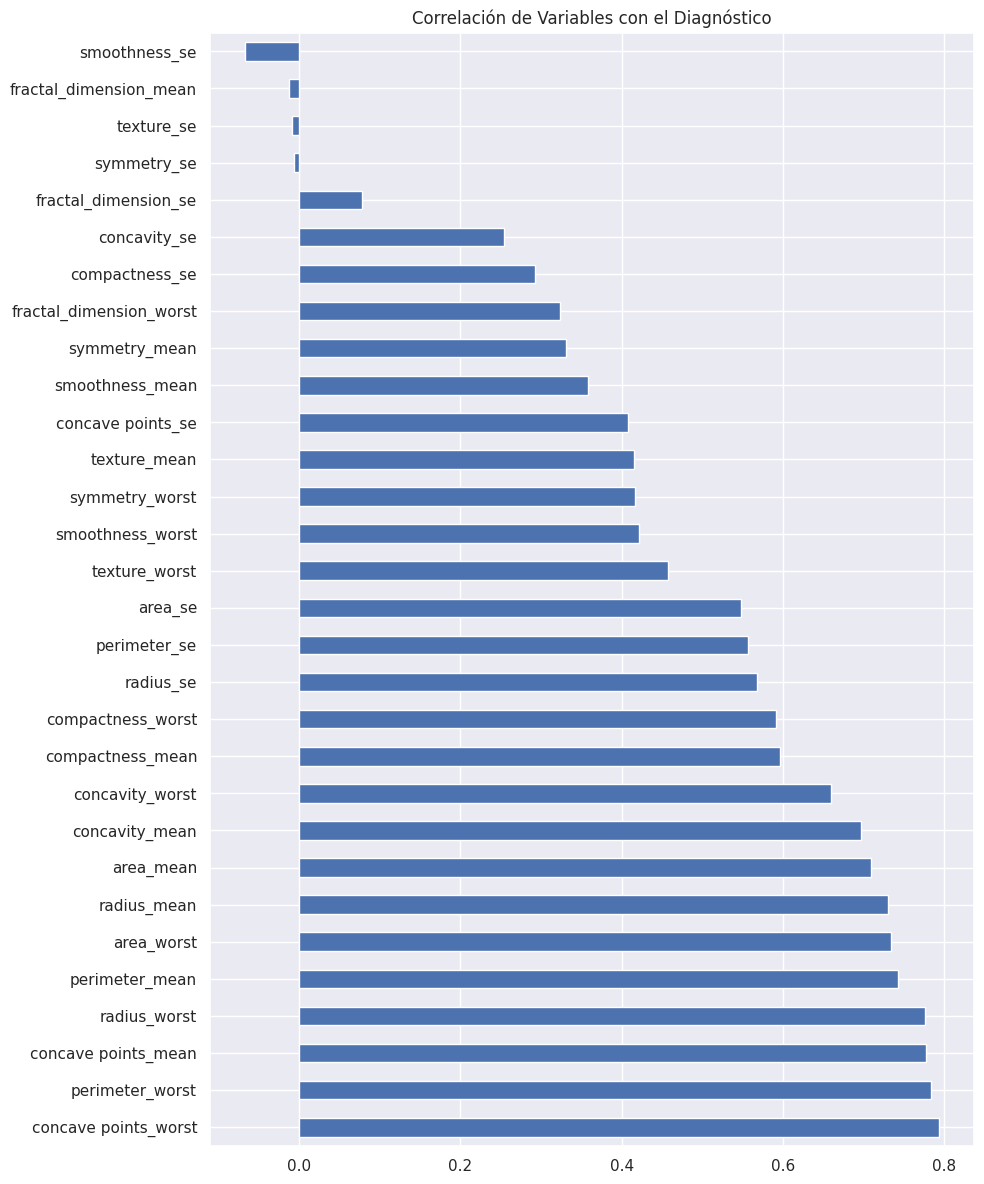

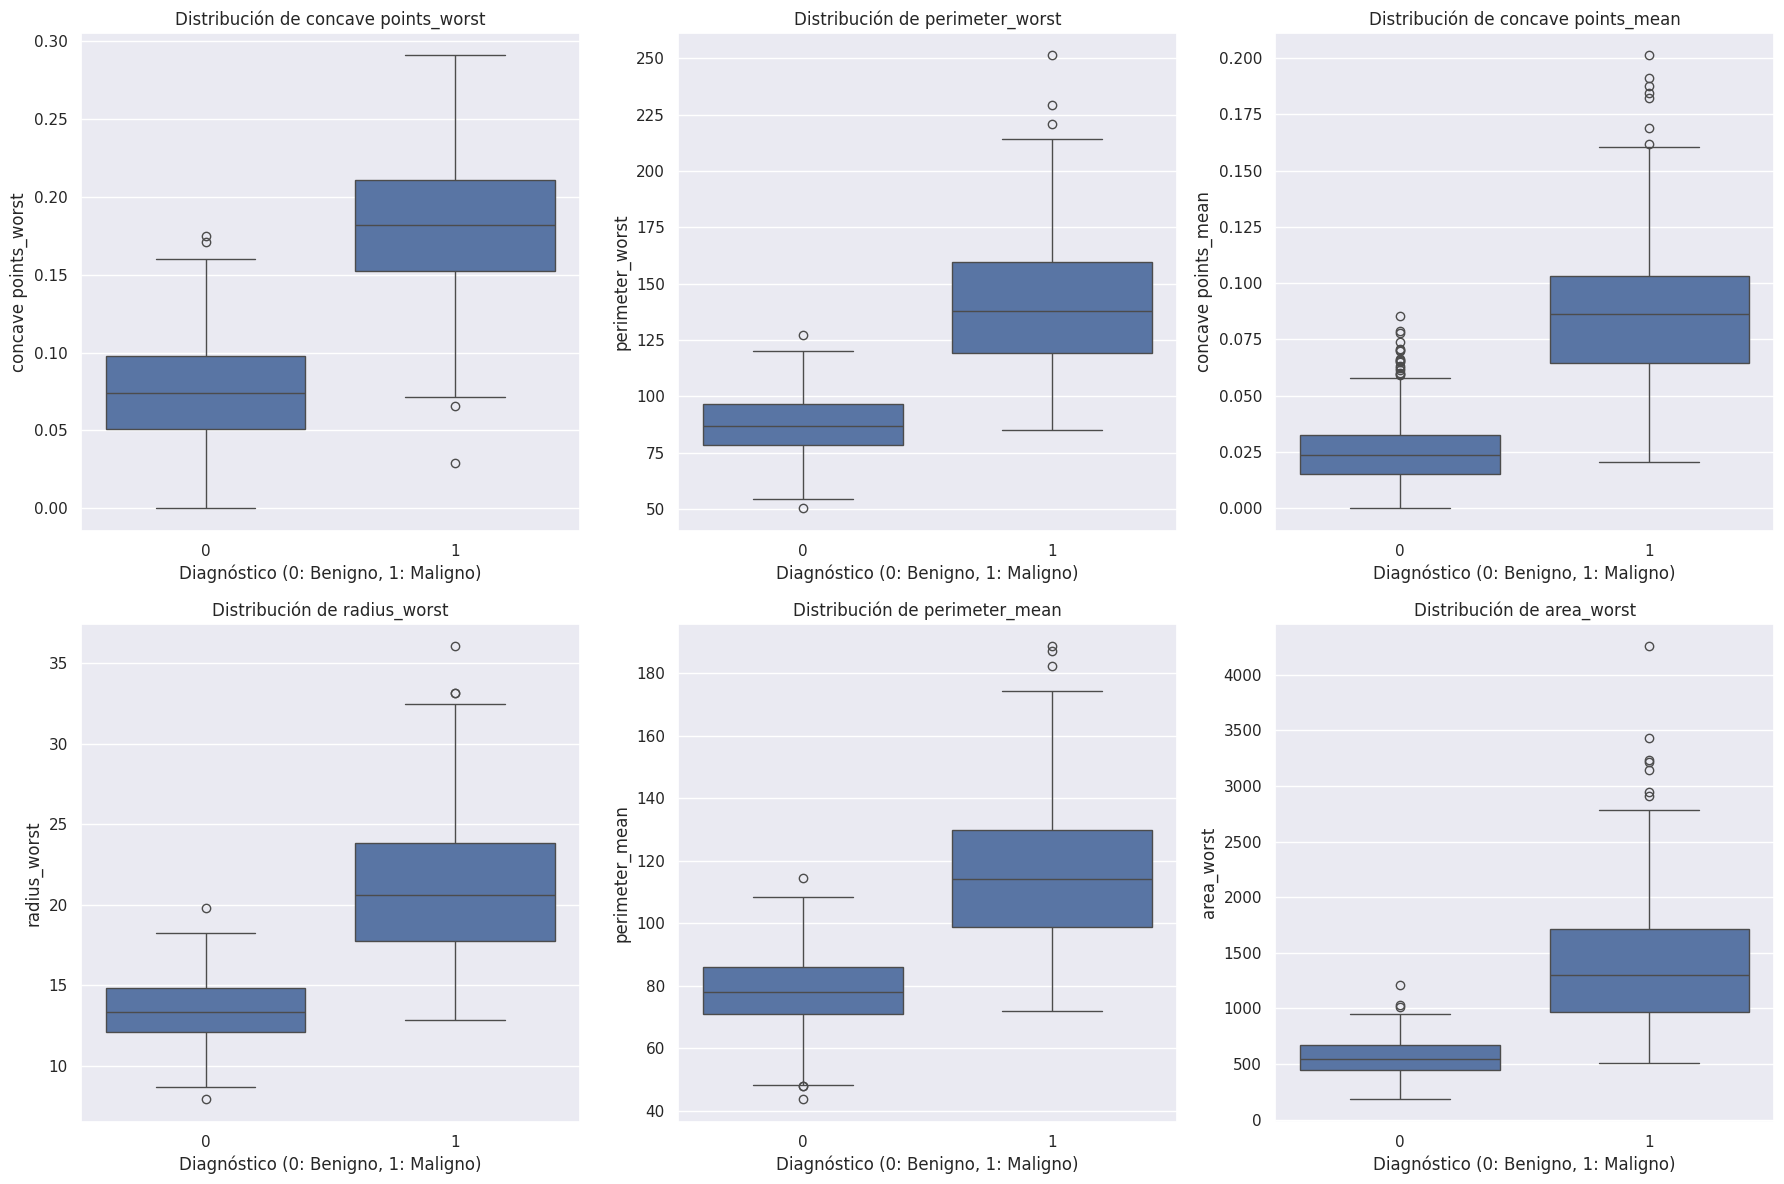

Variables con mayor correlación con el diagnóstico:
1. concave points_worst: 0.794
2. perimeter_worst: 0.783
3. concave points_mean: 0.777
4. radius_worst: 0.776
5. perimeter_mean: 0.743
6. area_worst: 0.734


In [4]:
#Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribución de Diagnósticos (0: Benigno, 1: Maligno)')
plt.show()

print(f"Proporción de casos benignos: {len(df[df['diagnosis']==0])/len(df):.2%}")
print(f"Proporción de casos malignos: {len(df[df['diagnosis']==1])/len(df):.2%}\n")

#Estadísticas descriptivas básicas
print("Forma del dataset:", df.shape)
print("\nInformación general del dataset:")
print(df.info())

#Matriz de correlación completa
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Características')
plt.tight_layout()
plt.show()

#Correlación con variable objetivo
plt.figure(figsize=(10, 8))
target_correlation = df.corr()['diagnosis'].sort_values(ascending=False)[1:]
target_correlation.plot(kind='barh', figsize=(10, 12))
plt.title('Correlación de Variables con el Diagnóstico')
plt.tight_layout()
plt.show()

#Boxplots de las variables más correlacionadas
top_features = target_correlation.abs().sort_values(ascending=False).index[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature}')
    axes[i].set_xlabel('Diagnóstico (0: Benigno, 1: Maligno)')

plt.tight_layout()
plt.show()

print("Variables con mayor correlación con el diagnóstico:")
for i, feature in enumerate(top_features, 1):
    corr_value = target_correlation[feature]
    print(f"{i}. {feature}: {corr_value:.3f}")


**R:** Notamos como los diagnosticos tienen más casos benignos, las variables con mayor correlación son aquellas relacionadas matemáticamente y las variables con mayor capacidad discriminativas son aquellas con mayor correlación con el diagnóstico.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

#Separar características y variable objetivo
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Proporción de clases en entrenamiento: {y_train.value_counts(normalize=True).values}")
print(f"Proporción de clases en prueba: {y_test.value_counts(normalize=True).values}")

#Normalización con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Datos escalados")
print(f"Media entrenamiento escalado: {np.mean(X_train_scaled):.6f}")
print(f"Desviación entrenamiento escalado: {np.std(X_train_scaled):.6f}")

#Eliminación de características altamente correlacionadas
correlation_threshold = 0.85
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns
          if any(upper_triangle[column] > correlation_threshold)]

print(f"Características a eliminar por alta correlación (> {correlation_threshold}):")
for feature in to_drop:
    correlated_with = upper_triangle[feature][upper_triangle[feature] > correlation_threshold].index.tolist()
    print(f"- {feature}: correlacionado con {correlated_with}")

#Aplicar eliminación si hay características para eliminar
if to_drop:
    X_train_reduced = np.delete(X_train_scaled,
                               [list(X.columns).index(col) for col in to_drop], axis=1)
    X_test_reduced = np.delete(X_test_scaled,
                              [list(X.columns).index(col) for col in to_drop], axis=1)
    print(f"\nDimensión después de eliminar correlaciones: {X_train_reduced.shape}")
else:
    X_train_reduced = X_train_scaled.copy()
    X_test_reduced = X_test_scaled.copy()
    print("No se eliminaron características por correlación")

#Selección de características con SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

#Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

print("Características seleccionadas por SelectKBest (top 15):")
for feature, score in zip(selected_features, scores):
    print(f"- {feature}: {score:.2f}")

print(f"\nDimensión después de SelectKBest: {X_train_selected.shape}")

#Usaremos los datos escalados completos para los siguientes análisis
X_processed = X_train_scaled
X_test_processed = X_test_scaled

Tamaño del conjunto de entrenamiento: (455, 30)
Tamaño del conjunto de prueba: (114, 30)
Proporción de clases en entrenamiento: [0.62637363 0.37362637]
Proporción de clases en prueba: [0.63157895 0.36842105]

Datos escalados - Media ~0, Desviación ~1
Media entrenamiento escalado: 0.000000
Desviación entrenamiento escalado: 1.000000
Características a eliminar por alta correlación (> 0.85):
- perimeter_mean: correlacionado con ['radius_mean']
- area_mean: correlacionado con ['radius_mean', 'perimeter_mean']
- concavity_mean: correlacionado con ['compactness_mean']
- concave points_mean: correlacionado con ['perimeter_mean', 'concavity_mean']
- perimeter_se: correlacionado con ['radius_se']
- area_se: correlacionado con ['radius_se', 'perimeter_se']
- radius_worst: correlacionado con ['radius_mean', 'perimeter_mean', 'area_mean']
- texture_worst: correlacionado con ['texture_mean']
- perimeter_worst: correlacionado con ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 

**R:** Para eliminar multicolinealidad, se identificaron 13 características altamente correlacionadas (>0.85) con otras, reduciendo la dimensionalidad de 30 a 17 variables. Finalmente, mediante SelectKBest se seleccionaron las 15 características más relevantes, donde 'concave points_worst', 'perimeter_worst' y 'radius_worst' mostraron los mayores scores F, indicando su fuerte poder discriminativo entre tumores benignos y malignos.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


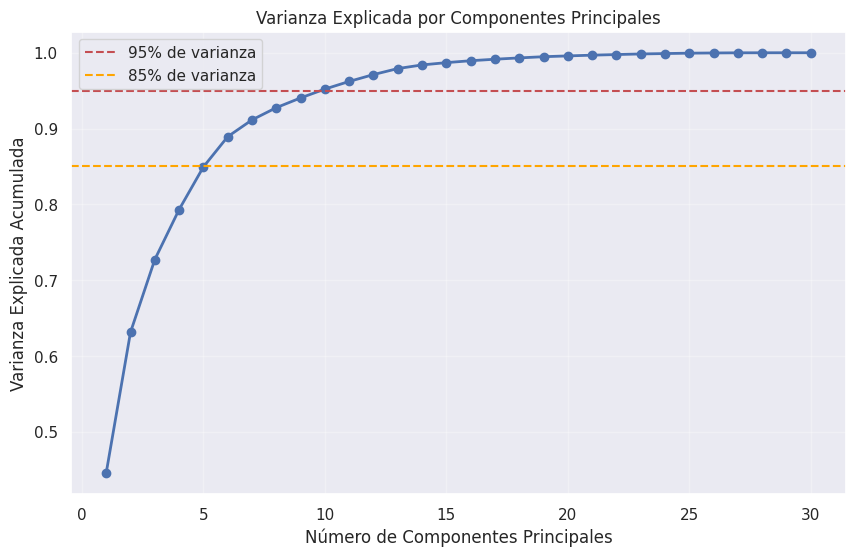

Componentes necesarios para 95% de varianza: 10
Varianza explicada por 2 componentes: 63.14%


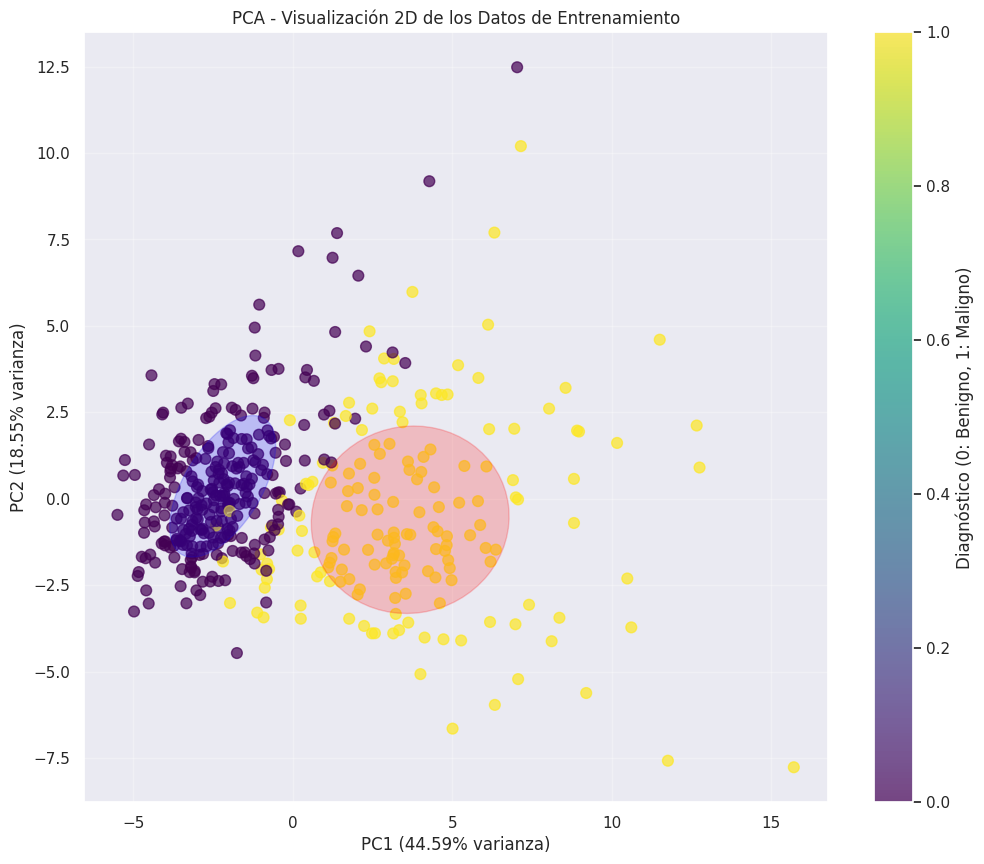

Aplicando t-SNE (esto puede tomar unos segundos)...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


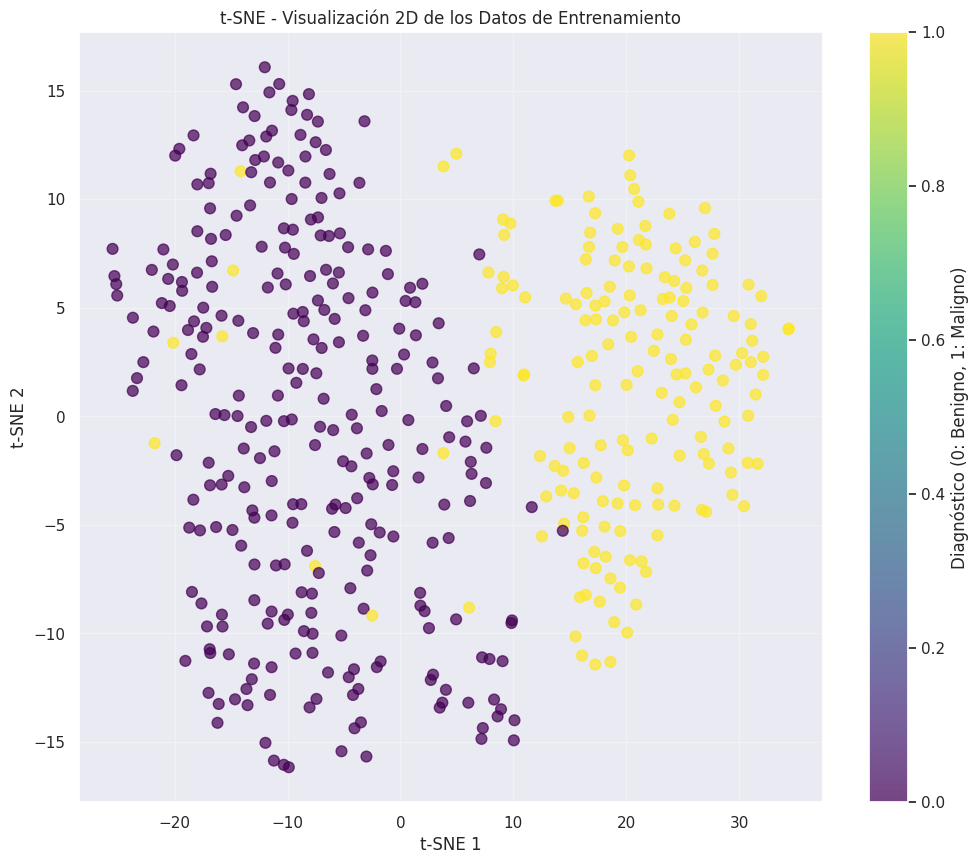


Comparación de métodos de reducción de dimensionalidad:
Varianza explicada por PC1 y PC2: 63.14%
t-SNE: Mejor para visualización de clusters, pero no preserva distancias globales


In [9]:
from sklearn.manifold import TSNE
#Análisis de PCA
pca = PCA()
X_pca = pca.fit_transform(X_processed)

#Varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.axhline(y=0.85, color='orange', linestyle='--', label='85% de varianza')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Encontrar número de componentes para 95% de varianza
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Componentes necesarios para 95% de varianza: {n_components_95}")
print(f"Varianza explicada por 2 componentes: {np.cumsum(pca.explained_variance_ratio_)[1]:.2%}")

#PCA con 2 componentes para visualización
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_processed)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train,
                     cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Diagnóstico (0: Benigno, 1: Maligno)')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('PCA - Visualización 2D de los Datos de Entrenamiento')
plt.grid(True, alpha=0.3)

# Agregar elipse para mostrar separación
from matplotlib.patches import Ellipse
for diagnosis in [0, 1]:
    points = X_pca_2d[y_train == diagnosis]
    if len(points) > 0:
        cov = np.cov(points.T)
        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)
        ell = Ellipse(xy=np.mean(points, axis=0),
                      width=lambda_[0]*2, height=lambda_[1]*2,
                      angle=np.degrees(np.arctan2(v[1,0], v[0,0])),
                      alpha=0.2, color='red' if diagnosis == 1 else 'blue')
        plt.gca().add_patch(ell)

plt.show()

#t-SNE para visualización
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_processed)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,
                     cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Diagnóstico (0: Benigno, 1: Maligno)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE - Visualización 2D de los Datos de Entrenamiento')
plt.grid(True, alpha=0.3)
plt.show()

#Comparación de métodos
print("\nComparación de métodos de reducción de dimensionalidad:")
print(f"Varianza explicada por PC1 y PC2: {pca_2d.explained_variance_ratio_.sum():.2%}")

**R:** El análisis de reducción de dimensionalidad revela que con PCA se necesitan 10 componentes principales para capturar el 95% de la varianza total, mientras que los primeros 2 componentes explican el 63.14% de la variabilidad. La visualización PCA 2D muestra una separación moderada entre clases, con cierto solapamiento pero tendencia clara de agrupamiento por diagnóstico. En contraste, t-SNE presenta una separación más nítida, formando clusters bien definidos con mínimo solapamiento, lo que sugiere que captura mejor la estructura no lineal subyacente.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Modelos a entrenar:
- Logistic Regression
- SVM
- Random Forest
Iniciando entrenamiento con validación cruzada...

Entrenando Logistic Regression...
Mejores parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
F1-Score: 0.9756
Accuracy: 0.9825

Entrenando SVM...
Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
F1-Score: 0.9630
Accuracy: 0.9737

Entrenando Random Forest...
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
F1-Score: 0.9630
Accuracy: 0.9737

Entrenamiento completado!

COMPARACIÓN DETALLADA DE MODELOS


,Model,Best Params,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.9825,1.0,0.9524,0.9756,0.9977
1,SVM,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.9737,1.0,0.9286,0.9630,0.9947
2,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.9737,1.0,0.9286,0.9630,0.9940



 MEJOR MODELO: Logistic Regression (F1-Score: 0.9756)

Métricas de evaluación:


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Model,,,,,
Logistic Regression,0.9825,1.0,0.9524,0.9756,0.9977
SVM,0.9737,1.0,0.9286,0.9630,0.9947
Random Forest,0.9737,1.0,0.9286,0.9630,0.9940


MATRICES DE CONFUSIÓN


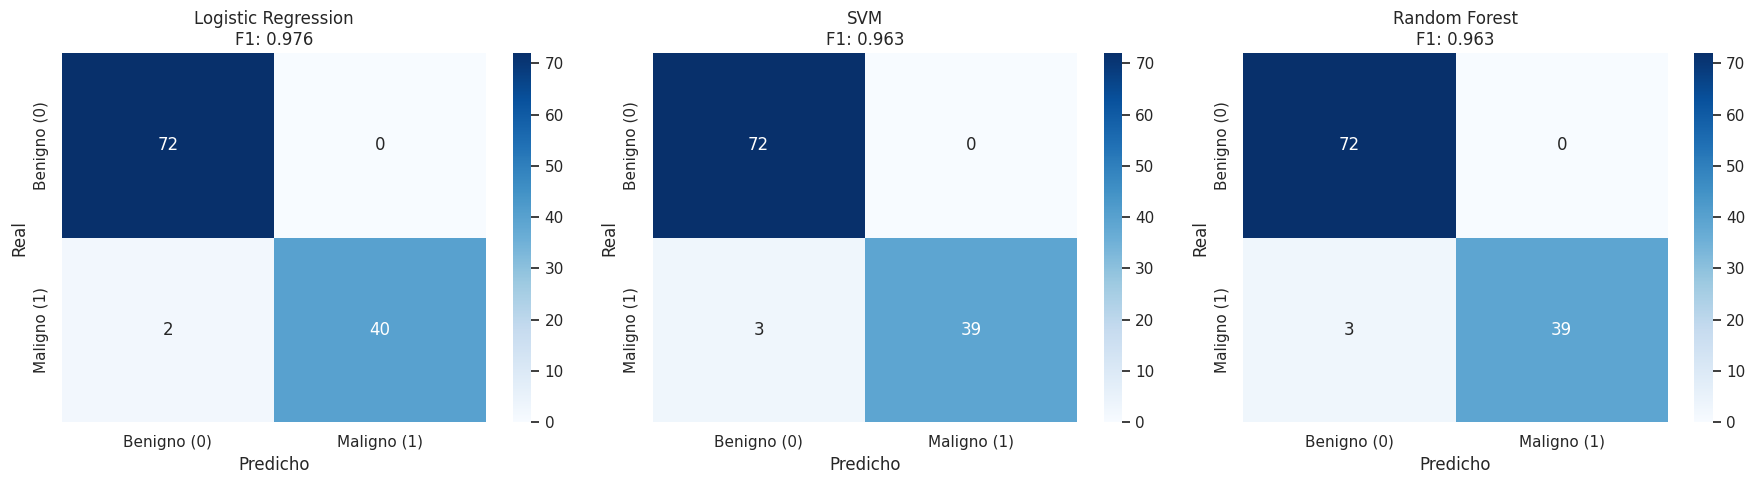


ANÁLISIS DE ERRORES POR MODELO:
Logistic Regression:
  - Falsos Negativos (maligno→benigno): 2
  - Falsos Positivos (benigno→maligno): 0
SVM:
  - Falsos Negativos (maligno→benigno): 3
  - Falsos Positivos (benigno→maligno): 0
Random Forest:
  - Falsos Negativos (maligno→benigno): 3
  - Falsos Positivos (benigno→maligno): 0


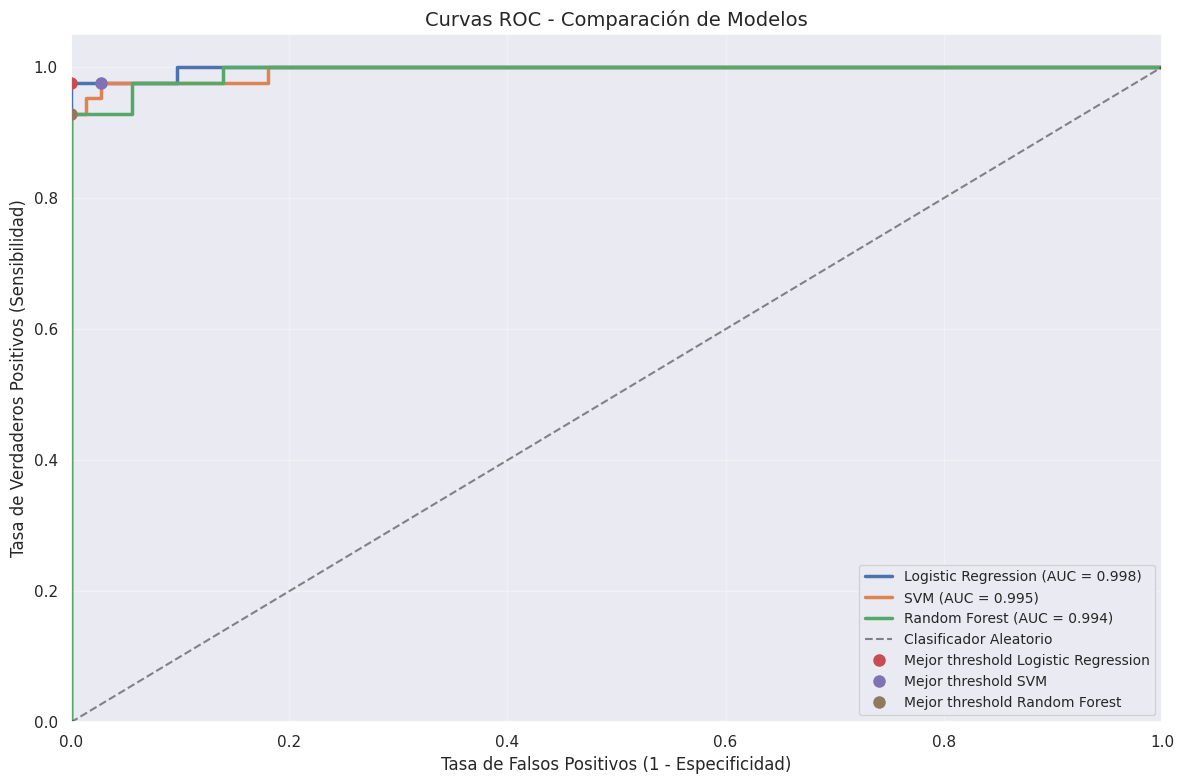

In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)

#Definición de modelos y parámetros para GridSearchCV
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

print("Modelos a entrenar:")
for model_name in models.keys():
    print(f"- {model_name}")

best_models = {}
results = []
for model_name, model_info in models.items():
    print(f"Entrenando {model_name}...")

    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_processed, y_train)

    best_models[model_name] = grid_search.best_estimator_

    #Predicciones
    y_pred = grid_search.predict(X_test_processed)
    y_pred_proba = grid_search.predict_proba(X_test_processed)[:, 1]

    #Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        'Model': model_name,
        'Best Params': str(grid_search.best_params_),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    })

    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}\n")

#Comparación detallada de resultados
results_df = pd.DataFrame(results)
display(results_df.round(4))

#Encontrar el mejor modelo
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model_score = results_df.loc[best_model_idx, 'F1-Score']

print(f"\n MEJOR MODELO: {best_model_name} (F1-Score: {best_model_score:.4f})")

#Métricas en formato de tabla
metrics_comparison = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']]
metrics_comparison = metrics_comparison.set_index('Model')
print("\nMétricas de evaluación:")
display(metrics_comparison.round(4))

#Matrices de confusión para cada modelo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_processed)
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Benigno (0)', 'Maligno (1)'],
                yticklabels=['Benigno (0)', 'Maligno (1)'])
    axes[idx].set_title(f'{model_name}\nF1: {results_df.iloc[idx]["F1-Score"]:.3f}')
    axes[idx].set_xlabel('Predicho')
    axes[idx].set_ylabel('Real')

plt.tight_layout()
plt.show()

#Análisis de errores
for idx, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_processed)
    cm = confusion_matrix(y_test, y_pred)
    fn = cm[1, 0]  #Falsos negativos
    fp = cm[0, 1]  #Falsos positivos

    print(f"{model_name}:")
    print(f"  - Falsos Negativos: {fn}")
    print(f"  - Falsos Positivos: {fp}")

#Curvas ROC comparativas
plt.figure(figsize=(12, 8))

for model_name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, linewidth=2.5,
             label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#Agregar punto de mejor threshold
for model_name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    #Encontrar el threshold que maximiza Youden's J statistic
    j_scores = tpr - fpr
    best_idx = np.argmax(j_scores)

    plt.plot(fpr[best_idx], tpr[best_idx], 'o', markersize=8,
             label=f'Mejor threshold {model_name}')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

**R:** El análisis comparativo revela que todos los modelos alcanzan un rendimiento excelente, con Logistic Regression destacando como el mejor modelo. Presenta el F1-Score más alto (0.9756), accuracy del 98.25%, y AUC-ROC casi perfecto (0.9977). Es significativo que todos los modelos logran precisión del 100% (cero falsos positivos), pero Logistic Regression supera en recall (95.24% vs 92.86% de los otros), cometiendo solo 2 falsos negativos frente a 3 de los demás modelos. Las curvas ROC confirman esta superioridad con el AUC más alto. Para diagnóstico médico donde los falsos negativos son críticos, Logistic Regression ofrece el mejor compromiso.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



In [17]:
#Análisis del mejor modelo
best_model_info = results_df.loc[best_model_idx]

print(f"\n MODELO RECOMENDADO: {best_model_info['Model']}")
print(f"MÉTRICAS DESTACADAS:")
print(f"    F1-Score: {best_model_info['F1-Score']:.4f}")
print(f"    Accuracy: {best_model_info['Accuracy']:.4f}")
print(f"    Precisión: {best_model_info['Precision']:.4f}")
print(f"    Recall: {best_model_info['Recall']:.4f}")
print(f"    AUC-ROC: {best_model_info['AUC-ROC']:.4f}")

print(f"\n PARÁMETROS ÓPTIMOS:")
print(f"   {best_model_info['Best Params']}")

print(f"\n RESULTADOS CLAVE:")
print(f"    Dataset: {df.shape[0]} muestras, {df.shape[1]-1} características")
print(f"    Mejor modelo: {best_model_info['Model']}")
print(f"    Rendimiento: F1-Score de {best_model_info['F1-Score']:.4f}")
print(f"    Capacidad discriminativa: AUC-ROC de {best_model_info['AUC-ROC']:.4f}")


 MODELO RECOMENDADO: Logistic Regression
MÉTRICAS DESTACADAS:
    F1-Score: 0.9756
    Accuracy: 0.9825
    Precisión: 1.0000
    Recall: 0.9524
    AUC-ROC: 0.9977

 PARÁMETROS ÓPTIMOS:
   {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

 RESULTADOS CLAVE:
    Dataset: 569 muestras, 30 características
    Mejor modelo: Logistic Regression
    Rendimiento: F1-Score de 0.9756
    Capacidad discriminativa: AUC-ROC de 0.9977


**R:** La Regresión Logística es la opción óptima por su combinación de alto rendimiento (F1-Score: 0.9756, AUC: 0.9977), interpretabilidad clínica y robustez. Su superioridad en recall (95.24%) es crucial en diagnóstico médico donde los falsos negativos tienen consecuencias graves.
La estandarización fue vital para modelos sensibles a escala como SVM. La eliminación de multicolinealidad mejoró la estabilidad sin sacrificar rendimiento, mientras que PCA demostró que pocas componentes capturan la esencia discriminativa de los datos.
Para un escenario real de diagnóstico médico, se podría recomendar implementar ensamblados de modelos para mayor robustez, incorporar análisis de costos asimétricos que penalicen más los falsos negativos, establecer protocolos de actualización continua con nuevos datos, y crear mecanismos de incertidumbre que alerten cuando el modelo no esté seguro.